# Importing all the Libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Loading dataset

In [56]:
data= pd.read_csv("diabetes2.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [57]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Checking for Missing Data

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [59]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [60]:
data.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [61]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

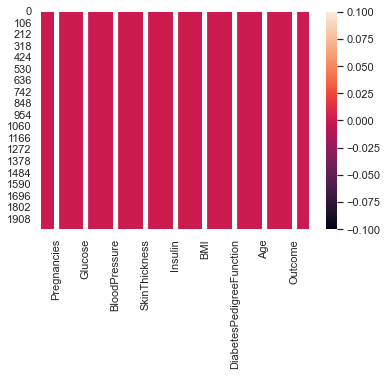

In [62]:
sns.heatmap(data.isnull(),annot= True)

In [63]:
data.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

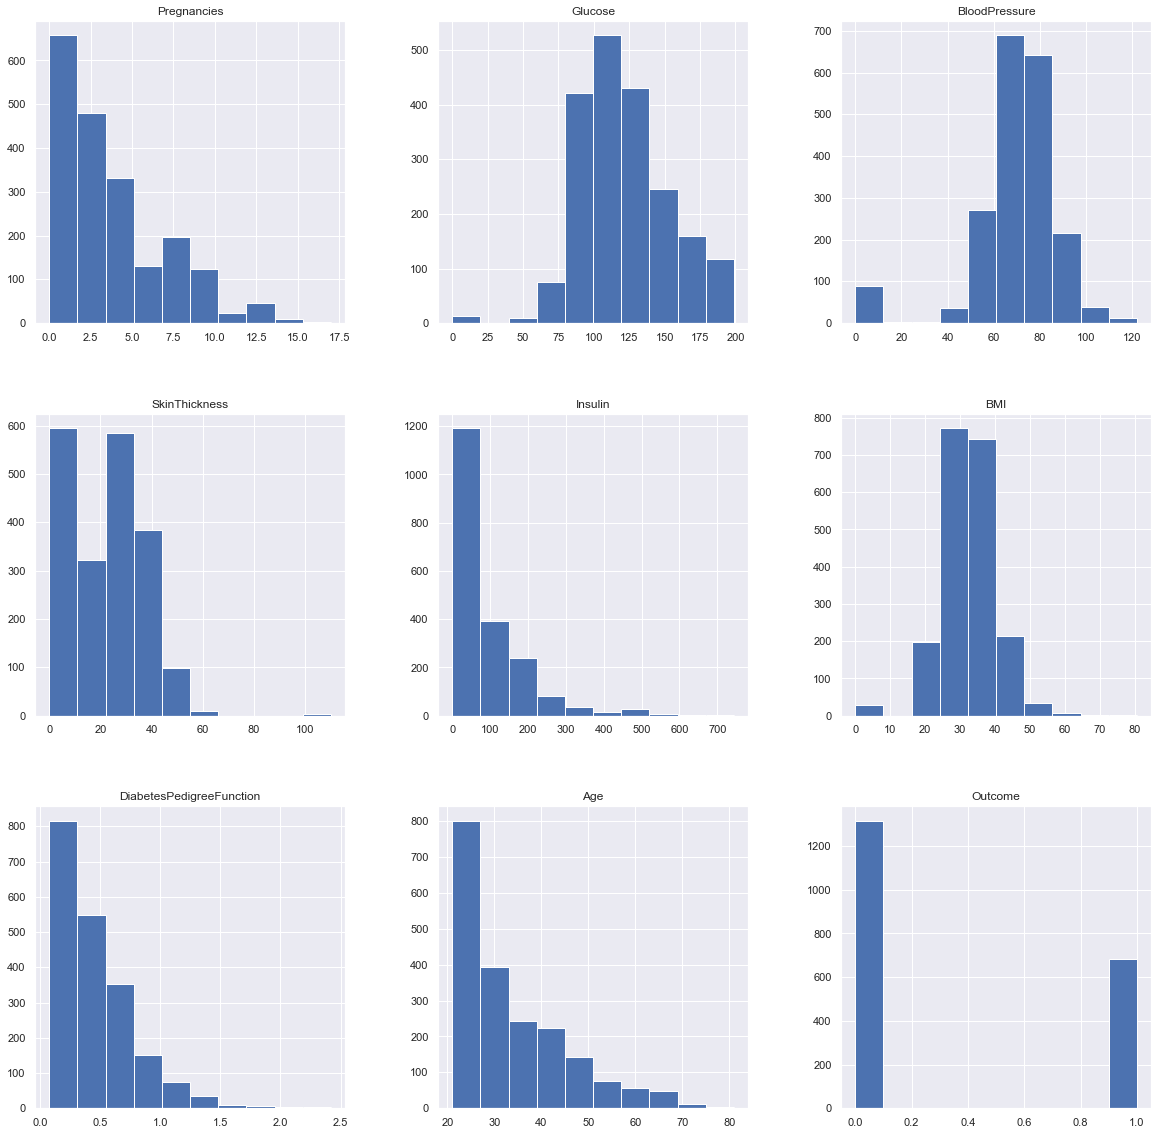

In [64]:
p = data.hist(figsize = (20,20))

<AxesSubplot:>

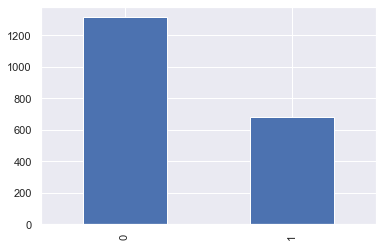

In [65]:
data.Outcome.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Age', ylabel='Density'>

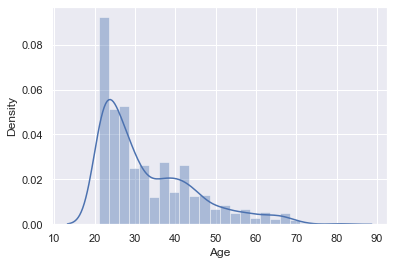

In [66]:
sns.distplot(data["Age"])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

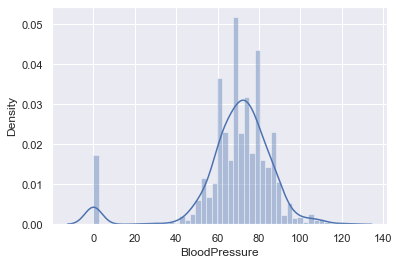

In [67]:
sns.distplot(data["BloodPressure"])

In [68]:
import imblearn

# Co-relation matrix

In [69]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.120405       0.149672      -0.063375   
Glucose                      0.120405  1.000000       0.138044       0.062368   
BloodPressure                0.149672  0.138044       1.000000       0.198800   
SkinThickness               -0.063375  0.062368       0.198800       1.000000   
Insulin                     -0.076600  0.320371       0.087384       0.448859   
BMI                          0.019475  0.226864       0.281545       0.393760   
DiabetesPedigreeFunction    -0.025453  0.123243       0.051331       0.178299   
Age                          0.539457  0.254496       0.238375      -0.111034   
Outcome                      0.224437  0.458421       0.075958       0.076040   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.076600  0.019475                 -0.025453   
Glucose                   0.320371  0.226

<AxesSubplot:>

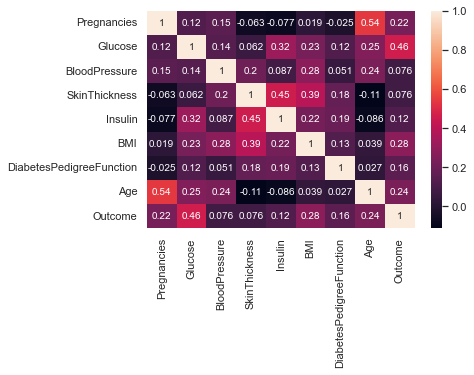

In [70]:
sns.heatmap(correlation,annot=True)

In [71]:
y= data["Outcome"]
x= data.drop(["Outcome"],axis=1)

In [72]:
import imblearn

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
smote = SMOTE()
x,y = smote.fit_resample(x,y)

In [75]:
y.value_counts()

1    1316
0    1316
Name: Outcome, dtype: int64

<AxesSubplot:>

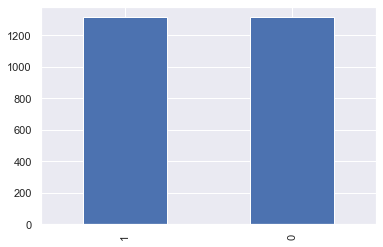

In [76]:
y.value_counts().plot(kind="bar")

# Train test split

In [77]:
y= data["Outcome"]
x= data.drop(["Outcome"],axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33
1996,8,179,72,42,130,32.7,0.719,36
1997,6,85,78,0,0,31.2,0.382,42
1998,0,129,110,46,130,67.1,0.319,26


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
x_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1954,8,84,74,31,0,38.3,0.457,39
1446,4,96,56,17,49,20.8,0.340,26
1735,0,179,50,36,159,37.8,0.455,22
1377,5,112,66,0,0,37.8,0.261,41
281,10,129,76,28,122,35.9,0.280,39
...,...,...,...,...,...,...,...,...
867,0,131,66,40,0,34.3,0.196,22
548,1,164,82,43,67,32.8,0.341,50
1798,3,158,64,13,387,31.2,0.295,24
983,2,91,62,0,0,27.3,0.525,22


# Train the Model

# LogisticRegression

In [79]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [80]:
predictions=model.predict(x_test)

In [81]:
print(predictions)

[0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 

In [82]:
predicted_df = pd.DataFrame({"Prediction":predictions,"Ground truth":y_test})

In [83]:
predicted_df

,Prediction,Ground truth
76,0,0
816,0,0
1842,1,1
1874,1,1
1102,0,0
...,...,...
1695,0,0
871,0,0
1488,0,1
192,1,1


In [84]:
accuracy = accuracy_score(predictions,y_test)

In [85]:
accuracy

0.7606060606060606

In [86]:
from sklearn.metrics import classification_report

In [87]:
classification_report(predictions,y_test)

'              precision    recall  f1-score   support\n\n           0       0.90      0.77      0.83       498\n           1       0.51      0.73      0.60       162\n\n    accuracy                           0.76       660\n   macro avg       0.70      0.75      0.72       660\nweighted avg       0.80      0.76      0.77       660\n'

# RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = RandomForestClassifier(n_estimators=600)
model.fit(x_train,y_train)
accuracy_1 = accuracy_score(y_test,model.predict(x_test))

In [90]:
classification_report(y_test,model.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       426\n           1       0.97      0.96      0.97       234\n\n    accuracy                           0.98       660\n   macro avg       0.97      0.97      0.97       660\nweighted avg       0.98      0.98      0.98       660\n'

In [91]:
accuracy_1

0.9757575757575757

## DecisionTree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
model4 = DecisionTreeClassifier(criterion="gini")

In [94]:
model4.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
predictions = model4.predict(x_test)
accuracy3 = accuracy_score(predictions,y_test)
accuracy3

0.946969696969697

# SVM

In [96]:
from sklearn import svm
model2=svm.SVC(kernel='linear')
model2.fit(x_train, y_train)
predicts=model2.predict(x_test)

In [97]:
accuracy2=accuracy_score(predicts,y_test)
accuracy2

0.7727272727272727

<AxesSubplot:>

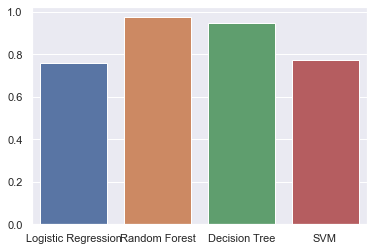

In [98]:
sns.barplot(x=["Logistic Regression", "Random Forest","Decision Tree","SVM"],y=[accuracy,accuracy_1,accuracy3,accuracy2])

In [99]:
model.feature_importances_


array([0.08221584, 0.25245336, 0.08909264, 0.0663005 , 0.07610049,
       0.17134102, 0.1271591 , 0.13533706])

<AxesSubplot:>

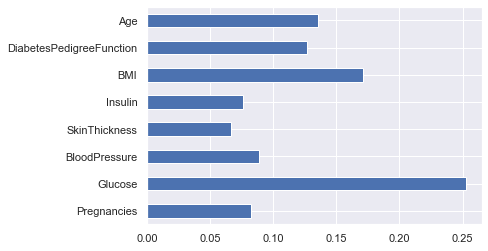

In [100]:
(pd.Series(model.feature_importances_, index=x.columns).plot(kind='barh'))

In [101]:
import pickle
models = pickle.dumps(model)
#open('model.pkl','wb'))
rfc_from_pickle = pickle.loads(models)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(x_test)

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [102]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [103]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [104]:
model.predict([[0,138,62,35,0,33.6,0.278,47]])

array([1], dtype=int64)

In [105]:
model.predict([[2,132,55,35,144,26.1,1.228,33]])

array([0], dtype=int64)